In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Chicago set

CSV file available from https://catalog.data.gov/dataset/crimes-one-year-prior-to-present-e171f

In [2]:
import open_cp.sources.chicago as chicago

points = chicago.default_burglary_data()

In [3]:
len(points.timestamps), points.time_range()

(59184,
 (numpy.datetime64('2016-02-29T06:25:00.000'),
  numpy.datetime64('2017-02-27T23:15:00.000')))

In [6]:
bbox = points.bounding_box()
print("X coord range:", bbox.xmin, bbox.xmax)
print("Y coord range:", bbox.ymin, bbox.ymax)
print(bbox.aspect_ratio)

X coord range: 334018.117311 367319.649846
Y coord range: 552879.750308 594819.314566
1.25938841447


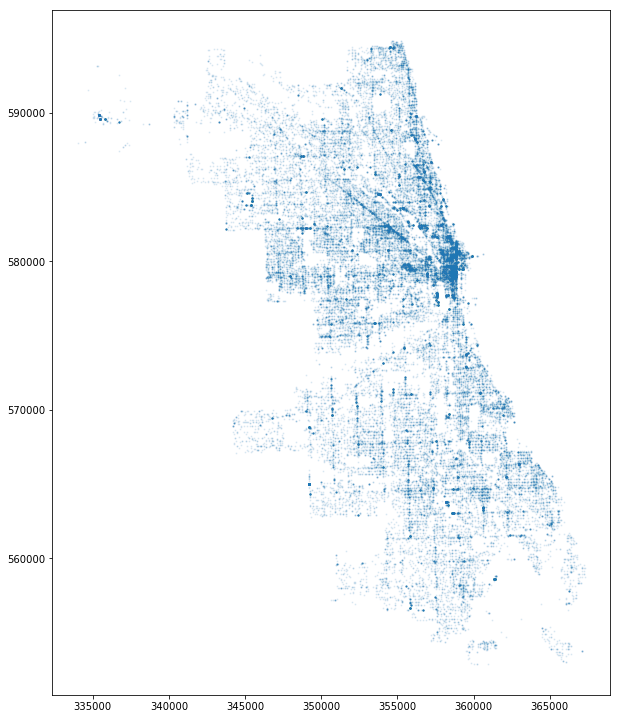

In [7]:
_, ax = plt.subplots(figsize=(10,10 * bbox.aspect_ratio))
ax.scatter(points.coords[0], points.coords[1], alpha=0.1, marker="o", s=1)

As an American city, most streets run North-South or East-West.  Further, the data is geocoded to the centre of the "block", to anonymise the data.  (Though this is slightly inconsistent, if one looks closely at the raw CSV file.)

In the plot above:

   - the clump at the upper left is the airport.
   - We see a large clump of theft data downtown.
   - It would be interesting to know what causes the visible lines running north north west from downtown.

In [9]:
mask = ( (points.xcoords >= 355000) & (points.xcoords <= 365000) &
        (points.ycoords >= 575000) & (points.ycoords <= 585000) )

downtown = points[mask]

bbox = downtown.bounding_box()
print("X coord range:", bbox.xmin, bbox.xmax)
print("Y coord range:", bbox.ymin, bbox.ymax)

X coord range: 355000.54864 360647.882859
Y coord range: 575007.0104 584997.43968


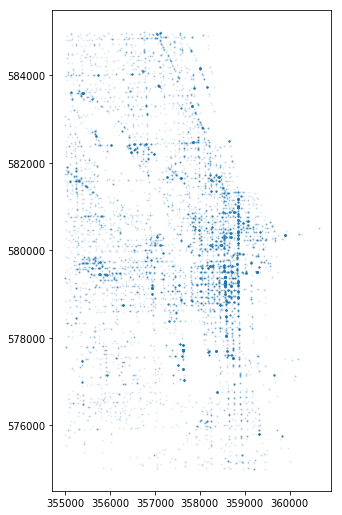

In [10]:
_, ax = plt.subplots(figsize=(5, 5 * bbox.aspect_ratio))
ax.scatter(downtown.coords[0], downtown.coords[1], alpha=0.1, marker="o", s=1)